<span style="font-size:8pt"><i>ENSAM-Bordeaux, Mathématiques et informatique. Date : le 14/11/22. Auteur : Éric Ducasse. Version : 1.4</i></span>

<div class="alert alert-block alert-danger"> <span style="color:#800000"> <b>On pourra faire exécuter ce notebook cellule par cellule (par « $\mathtt{Maj+Entrée}$ ») ou intégralement par « $\mathtt{Kernel\;\rightarrow\;Restart\;\&\;Run\;All}$ ».</b> </span> </div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sb
sb.init_printing()
from IPython.display import display # pour remplacer print
print("Version de sympy :", sb.__version__) 

Version de sympy : 1.8


# <span style="color:#0066BB"> **Calcul formel : TD n°1, seconde partie** </span>

## <span style="color: #0000BB"> *Exercice 4* </span>

### <span style="color:purple"> 4.1 Objectifs </span>

#### <span style="color:#005500"><i> Savoir dériver symboliquement des expressions mathématiques et remplacer dans celle-ci un symbole par un autre symbole ou une expression.</i> </span>

### <span style="color:purple"> 4.2 Exemples </span>

##### On peut récrire une expression en remplaçant un symbole par un autre symbole ou une expression, à l'aide de la méthode $~$<span style="color:#B00000"><b><tt>replace</tt></b></span>  :

In [ ]:
a,t = sb.symbols("a,t")
T = 3+2*a*sb.sin(t)-4*sb.sin(a*t)
T

Syntaxe : <span style="color:#800000"><b><tt>expression.replace(old, new)</tt></b></span>, où <span style="color:#800000"><b><tt>old</tt></b></span> désigne un symbole ou une fonction, renvoie une <u>nouvelle expression</u>.

In [ ]:
[T, T.replace(t,0), T.replace(t,sb.pi) ]

In [ ]:
n = sb.symbols("n", integer=True)
[ T, T.replace(t,sb.pi).replace(a,n) ]

In [ ]:
[ T, T.replace(t,sb.pi).replace(a,sb.symbols("n", integer=True)+sb.S(1)/2) ]

In [ ]:
[ T, T.replace(sb.sin, sb.cos), T.replace(sb.sin, sb.exp) ]

In [ ]:
T.replace(sb.sin, lambda x:x ) # Fonction identité

$\bullet$ Ne fonctionne pas lorsque que <span style="color:#0000B0"><b><tt>old</tt></b></span> est un nombre ou une partie de sous-expression* :<br><br>$\hspace{10mm}$ <span style="font-size:8pt"> $(*)$ Pour certaines sous-expressions, cela fonctionne néanmoins mais le pourquoi du comment n'est pas exigible.</span>

In [ ]:
[ T.replace(2*a,10), T.replace(4,a) ]

##### On dérive une expression à l'aide de la méthode  <span style="color:#B00000;font-family:Courier New;font-style:normal;font-size:12pt"> $~$diff </span>  :

In [ ]:
x,y,a,b,c,t,w = sb.symbols("x,y,a,b,c,t,omega")
wave = sb.cos( a*x + b*y ) * sb.exp( sb.I*w*t )
wave

* Dérivée première par rapport à $x$ :

In [ ]:
wave.diff(x)

* Dérivée seconde par rapport à $x$ :

In [ ]:
wave.diff(x,2)

* Laplacien $\displaystyle\Delta=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}$

In [ ]:
lap = (wave.diff(x,2)+wave.diff(y,2)).factor() ; lap

* Opérateur de propagation acoustique $\displaystyle\frac{1}{c^2}\,\frac{\partial^2}{\partial t^2}-\Delta$

In [ ]:
(wave.diff(t,2)/c**2-lap).simplify()

### <span style="color:purple"> 4.3 Travail à faire </span>

$a)$ Définir l'expression <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">D0</span> $\displaystyle=(x+b)\,\exp(-a\,x)$. Faire afficher les dérivées première et seconde de <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">D0</span> par rapport à $x$, notées respectivement <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">D1</span> et <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">D2</span>.

In [ ]:
a,b,x = sb.symbols("a,b,x")
D0 = (x+b)*sb.exp(-a*x) ; D0

In [ ]:
D1 = D0.diff(x,1).simplify() ; D1

In [ ]:
D2 = D0.diff(x,2).simplify() ; D2

In [ ]:
D2.equals(D1.diff(x))

$b)$ Vérifier que la fonction $\displaystyle x\mapsto (x+b)\,\exp(-a\,x)$ est solution de l'équation différentielle $\displaystyle f^{\prime\prime}(x)+2\,a\,f^{\prime}(x)+a^2\,f(x)=0$.

In [ ]:
(D2 + 2*a*D1 + a**2*D0).equals(0)

$c)$ Calculer $\displaystyle f^{\prime\prime}(x)+2\,a\,f^{\prime}(x)+a^2\,f(x)$ **<span style="color:purple">sous forme factorisée<span/>** pour les fonctions $f$ suivantes :<br /> $\hspace{6cm}$
$\displaystyle x\mapsto\exp(-c\,x)\quad$ et $\displaystyle \quad x\mapsto(a^2-d^2)\,\cos(d\,x)+2\,a\,d\,\sin(d\,x)$.

In [ ]:
c,d = sb.symbols("c,d")
[ (e.diff(x,2) +2*a*e.diff(x,1) + a**2*e).factor() for e in \
        [sb.exp(-c*x),(a**2-d**2)*sb.cos(d*x)+2*a*d*sb.sin(d*x)] ]

$d)$ Même question pour $x\mapsto f(x-x_0)$ et $x\mapsto f(-x)$, où $f(x)=\mathtt{D0}=(x+b)\,\exp(-a\,x)$.

In [ ]:
x0 = sb.symbols("x_0")
[ (e.diff(x,2) +2*a*e.diff(x,1) + a**2*e).factor() for e in \
        [D0.replace(x,x-x0),D0.replace(x,-x) ] ]

## <span style="color: #0000BB"> *Exercice 5* </span>

### <span style="color:purple"> 5.1 Objectifs </span>

####  <span style="color:#005500"> <i>Savoir intégrer symboliquement des expressions mathématiques et déterminer la valeur exacte d’une intégrale.</i> </span>

### <span style="color:purple"> 5.2 Exemples </span>

#### <span style="color:#007070"><i>Primitives</i></span>

* Calcul direct

In [ ]:
t = sb.symbols("t")
[ (t**n).integrate(t) for n in range(10) ]

In [ ]:
a = sb.symbols("alpha")
sb.integrate(t**a,t)  # équivalent à (t**a).integrate(t)

* Si on spécifie que $\beta>0$ :

In [ ]:
b = sb.symbols("beta", positive=True)
(t**b).integrate(t)

* Calcul en 2 temps : définition de l'intégrale sans la calculer, puis calcul (déconseillé en général)

$\star$ Intégrale non calculée :

In [ ]:
pne = sb.Integral(sb.log(t)/t**2,t) ; pne

$\star$ Calcul de l'intégrale par la méthode <b><tt>doit</tt></b> :

In [ ]:
pev = pne.doit() ; pev.together()

$\star$ Vérification :

In [ ]:
pev.diff(t)

#### <span style="color:#007070"><i>Intégrales</i></span>

In [ ]:
n,m = sb.symbols("n,m", integer=True, positive=True)
ps = sb.integrate( sb.cos(2*sb.pi*n*t) * sb.cos(2*sb.pi*m*t), (t, 0, 1) ) ; ps

#### <span style="color:#007070"><i>Intégrales généralisées</i></span>

* Transformées de Laplace : $\displaystyle F(p)=\int_0^{\infty}f(t)\,\exp(-p\,t)\;\mathbb{d}t$

In [ ]:
p,w,a = sb.symbols("p,omega,a", positive=True)
sb.integrate( sb.sin(w*t) * sb.exp(-p*t), (t, 0, sb.oo) ).together()

In [ ]:
[ sb.integrate( f_de_t * sb.exp(-p*t), (t,0,sb.oo) ).simplify() \
      for f_de_t in [sb.sin(w*t), sb.cos(w*t), sb.sin(w*t)*sb.exp(-a*t)] ]

* $\displaystyle \int_{-1}^{1}\frac{1}{\sqrt{1-t^2}}\;\mathbb{d}t$

In [ ]:
sb.integrate( 1 / sb.sqrt(1-t**2), (t,-1,1) )

### <span style="color:purple"> 5.3 Travail à faire </span>

$a)$ Déterminer une primitive de $\displaystyle t\mapsto\frac{1}{\sqrt{2\,\pi}}\,\exp\!\left(\frac{-t^2}{2}\right)$.

In [ ]:
t = sb.symbols("t")
G = 1/sb.sqrt(2*sb.pi) * sb.exp(-t**2/2) ; G

In [ ]:
G.integrate(t)

$b)$ Déterminer pour tout réel $x$ : $\displaystyle \frac{1}{\sqrt{2\,\pi}}\int_{-\infty}^{x}\exp\!\left(\frac{-t^2}{2}\right)\,\mathbb{d}t$.

In [ ]:
x = sb.symbols("x", real=True)
F = sb.integrate(G, (t,-sb.oo,x) ).together() ; F

$c)$ Vérifier que $\displaystyle \frac{1}{\sqrt{2\,\pi}}\int_{-\infty}^{\infty}t^2\,\exp\!\left(\frac{-t^2}{2}\right)\,\mathbb{d}t=1$.

In [ ]:
sb.integrate( t**2 * G,  (t,-sb.oo,sb.oo) ).equals(1)

$d)$ Plus généralement, déterminer $\displaystyle I_n=\frac{1}{\sqrt{2\,\pi}}\int_{-\infty}^{\infty}t^{2\,n}\,\exp\!\left(\frac{-t^2}{2}\right)\,\mathbb{d}t$, où $n$ est un entier naturel non nul.

In [ ]:
n = sb.symbols("n", integer=True, positive=True)
In = sb.integrate( t**(2*n) * G, (t,-sb.oo,sb.oo) ).simplify() ; In

$e)$ Vérifier que $\displaystyle I_n=\frac{(2\,n)!}{2^n\,n!}$, en utilisant la fonction <b><tt>sympy.factorial</tt></b>.

In [ ]:
Jn = sb.factorial(2*n) / ( 2**n * sb.factorial(n) ) ; Jn

In [ ]:
In.equals(Jn)

## <span style="color: #0000BB"> *Exercice 6* </span>

### <span style="color:purple"> 6.1 Objectifs </span>

#### <span style="color:#005500"> <i>Savoir créer une fonction indéfinie et la manipuler.</i> </span>

### <span style="color:purple"> 6.2 Exemples </span>

In [16]:
x,y,z,t = sb.symbols("x,y,z,t")
f = sb.Function("f")
[ f(e) for e in [x,y,z,t,1,sb.S(2)/5] ]

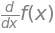

In [17]:
f(x).diff(x)

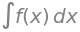

In [18]:
sb.integrate(f(x),x)

In [6]:
[ sb.integrate(f(x).diff(x),x), sb.integrate(f(x),x).diff(x) ]

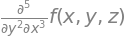

In [19]:
f(x,y,z).diff(x,3,y,2)

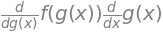

In [20]:
g = sb.Function("g")
f(g(x)).diff(x)

In [9]:
f(sb.sqrt(1-x**2)).diff(x)

   ⎛ d        ⎞│      ________ 
-x⋅⎜───(f(ξ₁))⎟│     ╱      2  
   ⎝dξ₁       ⎠│ξ₁=╲╱  1 - x   
───────────────────────────────
             ________          
            ╱      2           
          ╲╱  1 - x            

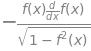

In [10]:
sb.sqrt(1-f(x)**2).diff(x)

### <span style="color:purple"> 6.3 Travail à faire </span>

L'objet de cet exercice est de retrouver l'expression du Laplacien en coordonnées polaires

$a)$ Définir les symboles réels $x$, $y$ et $a$, le symbole $r$ positif ou nul (« non négatif ») , ainsi que les fonctions <b><tt>F_c</tt></b> et <b><tt>F_p</tt></b>.

In [21]:
x,y,a = sb.symbols("x,y,a", real=True)
r = sb.symbols("r", nonnegative=True)
F_c,F_p = sb.Function("F_c"),sb.Function("F_p")

$\star$ Le Laplacien en coordonnées cartésiennes s'écrit :

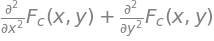

In [22]:
try :
    delta_Fc = F_c(x,y).diff(x,2) + F_c(x,y).diff(y,2) 
    display(delta_Fc)
except Exception as e :
    print("Erreur :",e)

$b)$ Définir les expressions $R=\sqrt{x^2+y^2}$ et $A=\mathrm{arctan}_2(y,x)$ (fonction <b><tt>sympy.atan2</tt></b>),<br />$\hspace{4mm}$ puis en déduire $\displaystyle
\Delta F_p(R,A) = \frac{\partial^2}{\partial x^2}\,F_p(R,A)+\frac{\partial^2}{\partial y^2}\,F_p(R,A)$.<br />$\hspace{6mm}$Une fois le résultat obtenu, le développer, puis le simplifier, puis le développer à nouveau.

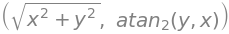

In [13]:
R,A = sb.sqrt(x**2+y**2), sb.atan2(y,x) ; (R,A)

In [14]:
delta_Fp = (F_p(R,A).diff(x,2)+F_p(R,A).diff(y,2)).expand().simplify().expand() ;
delta_Fp

   ⎛  2                      ⎞│                     ⎛  2                      
 2 ⎜ ∂                       ⎟│                   2 ⎜ ∂                       
x ⋅⎜────(Fₚ(ξ₁, atan2(y, x)))⎟│      _________   y ⋅⎜────(Fₚ(ξ₁, atan2(y, x)))
   ⎜   2                     ⎟│     ╱  2    2       ⎜   2                     
   ⎝∂ξ₁                      ⎠│ξ₁=╲╱  x  + y        ⎝∂ξ₁                      
────────────────────────────────────────────── + ─────────────────────────────
                    2    2                                           2    2   
                   x  + y                                           x  + y    
                                                                              

⎞│                  ⎛  2 ⎛  ⎛   _________    ⎞⎞⎞│                             
⎟│                  ⎜ ∂  ⎜  ⎜  ╱  2    2     ⎟⎟⎟│                             
⎟│      _________   ⎜────⎝Fₚ⎝╲╱  x  + y  , ξ₂⎠⎠⎟│                 ⎛ ∂         
⎟│     ╱  2    2    ⎜   2                      ⎟│  

$c)$ Arranger le résultat précédent en remplaçant dans l'ordre $A$ par $a$, $x$ par $(r\,\cos(a))$ et $y$ par $(r\,\sin(a))$, puis en simplifiant deux fois de suite. 

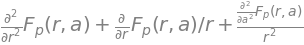

In [23]:
D = delta_Fp.replace(A, a).replace(x, r*sb.cos(a)).replace(y, r*sb.sin(a)).simplify().simplify()
D

## <span style="color: #0000BB"> *Exercice 7* </span>

### <span style="color:purple"> 7.1 Objectifs </span>

#### <span style="color:#005500"> <i>Savoir obtenir le développement limité d’une expression par rapport à l’un de ses paramètres, <br />au voisinage d’une valeur donnée et à un ordre donné.</i> </span>

### <span style="color:purple"> 7.2 Exemples </span>

#### *Développement limité en zéro*

In [24]:
x,h =sb.symbols("x,h")
sb.exp(x).series(x,0,4)

In [25]:
f =sb.Function("f")
f(x).series(x,0,3)

                             ⎛  2      ⎞│           
                           2 ⎜ d       ⎟│           
                          x ⋅⎜───(f(ξ))⎟│           
                             ⎜  2      ⎟│           
         ⎛d       ⎞│         ⎝dξ       ⎠│ξ=0    ⎛ 3⎞
f(0) + x⋅⎜──(f(ξ))⎟│    + ────────────────── + O⎝x ⎠
         ⎝dξ      ⎠│ξ=0           2                 

#### *Développement limité ailleurs qu'en zéro*

Le résultat est un peu lourd :

In [26]:
sb.log(x).series(x,1,4)

On peut préférer plutôt :

In [27]:
sb.log(1+h).series(h,0,4)

#### *Développements limités généralisés*

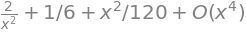

In [28]:
(1/(1-sb.cos(x))).series(x,0,4)

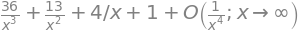

In [29]:
((1+x**2)/(x-2)**2).series(x,sb.oo,4)

#### *Récupérer le résultat sans le $O(h^n)$ :*

Il faut utiliser la méthode <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">replace</span> de la façon suivante :

In [30]:
n = sb.symbols("n", integrer=True, positive=True)
[sb.O(x**2), sb.O(h**n,h)]

In [31]:
[ e.replace(sb.O, lambda *X:0) for e in [sb.O(x**2), sb.O(h**n,h)] ]

* « <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">lambda *X:0</span> » désigne la fonction qui renvoie l'entier 0 et qui prend un nombre quelconque d'arguments :

In [32]:
fonction_nulle = lambda *X:0
[fonction_nulle(), fonction_nulle(3), fonction_nulle(x,n), fonction_nulle(1,2,n), fonction_nulle(1,2,3,n)]

Enlever le $O(h^n)$ peut faciliter la manipulation du résultat : 

In [33]:
DL_en1_ord4 = sb.log(x).series(x,1,4)
DL_en1_ord4 

In [34]:
[DL_en1_ord4 .expand(),DL_en1_ord4 .factor()]

In [35]:
DL_en1_ord4_sans_O = DL_en1_ord4.replace(sb.O, lambda *X:0)
DL_en1_ord4_sans_O

In [36]:
[DL_en1_ord4_sans_O.expand(), DL_en1_ord4_sans_O.factor()]

### <span style="color:purple"> 7.3 Travail à faire </span>

L'objet de cet exercice est l'étude d'une courbe paramétrée définie par $\displaystyle\left\lbrace\begin{array}{lll}
x(t) & = & 7\,\sin^2(t) \\ y(t) & = & 2\,\sin(t)\,(1+\cos(3\,t))
\end{array}\right .$.

$a)$ Définir les expressions symboliques <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">X</span> $=x(t)$ et <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">Y</span> $=y(t)$. Vérifier que ces expressions sont $2\,\pi$-périodiques et étudier leurs parités. <br /> $\hspace{5mm}$Montrer que la courbe paramétrée passe par un même point en $t=0$ et en $t=\pi$, ainsi que pour $\displaystyle t=\frac{\pi}{6}$ et $\displaystyle t=\frac{5\,\pi}{6}$.

In [37]:
t = sb.symbols("t", real=True)
X,Y = 7*sb.sin(t)**2,2*sb.sin(t)*(1+sb.cos(3*t))

* $2\pi$-périodicité :

In [38]:
X.equals(X.replace(t,t+2*sb.pi)) and Y.equals(Y.replace(t,t+2*sb.pi))

True

* $X$ est paire et $Y$ est impaire (symétrie de la courbe paramétreé par rapport à l'axe des ordonnées) :

In [39]:
X.equals(X.replace(t,-t)) and (-Y).equals(Y.replace(t,-t))

True

* Comparaisons

In [40]:
[ (X.replace(t,v),Y.replace(t,v)) for v in [0,sb.pi] ]

In [41]:
[ (X.replace(t,v),Y.replace(t,v)) for v in [sb.pi/6,5*sb.pi/6] ]

$b)$ Définir les expressions symboliques <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">dX</span> $=x^{\prime}(t)$ et <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">dY</span> $=y^{\prime}(t)$. Vérifier que <span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">dX</span> s'annule pour $\displaystyle t\in\left\lbrace 0,\frac{\pi}{2},\pi\right\rbrace$ et que <br /><span style="color:#0000B0;font-family:Courier New;font-style:normal;font-weight:bold;font-size:12pt">dY</span> s'annule pour $\displaystyle t\in\left\lbrace \mathrm{arccos}\!\left(\frac{1+\sqrt{7}}{4}\right),\frac{\pi}{3},\mathrm{arccos}\!\left(\frac{1-\sqrt{7}}{4}\right),\pi\right\rbrace$ (fonction <b><tt>sympy.acos</tt></b>).

In [42]:
dX,dY = X.diff(t),Y.diff(t).simplify() ; dX,dY

In [43]:
[ dX.replace(t,v).equals(0) for v in [0,sb.pi/2,sb.pi] ]

[True, True, True]

In [44]:
LT2 = [sb.acos((1+sb.sqrt(7))/4),sb.pi/3,sb.acos((1-sb.sqrt(7))/4),sb.pi] ; LT2

In [45]:
[ dY.replace(t,v).equals(0) for v in LT2 ]

[True, True, True, True]

$\bullet$ <u>Remarque</u> : évaluation numérique d'expressions exactes

$\star$ Convertion simple en flottant (<b><tt>float</tt></b>) :

In [46]:
[ float(v) for v in LT2 ]

$\star$ Convertion en flottant (<b><tt>float</tt></b>) avec réglage du nombre de chiffres après la virgule :

In [47]:
[ round(float(v),4) for v in LT2 ]

$\star$ Variante, avec la méthode <b><tt>evalf</tt></b> qui permet de choisir le nombre de chiffres significatifs (argument optionnel <b><tt>n</tt></b>) :

In [48]:
[ v.evalf( n=5 )  for v in LT2 ] 

$\bullet$ Tracé de la courbe paramétrée (la fonction <b><tt>sympy.lambdify</tt></b> sera détaillée plus tard) :

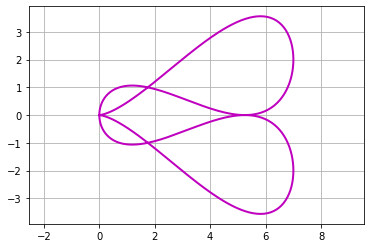

In [49]:
X_num,Y_num = sb.lambdify(t, X, "numpy"),sb.lambdify(t, Y, "numpy")
def tracer() :
    T = np.linspace(-np.pi,np.pi,510)
    plt.plot(X_num(T),Y_num(T),"-m",linewidth=2)
    plt.grid() ; plt.axis("equal")
tracer()

$c)$ Faire des développements limités de $X$ et $Y$ à l'ordre 4 lorsque $t$ est au voisinage de $0$. Faire tracer ensuite la courbe paramétrée correspondante, pour $t$ dans l'intervalle $[-0.6,0.6]$. On rappellera la fonction <b><tt>tracer</tt></b> pour superposer les deux courbes.

In [50]:
dlX = X.series(t,0,4) ; dlY = Y.series(t,0,4) ; (dlX,dlY)

In [51]:
dlX0,dlY0 = dlX.replace(sb.O,lambda *x:0),dlY.replace(sb.O,lambda *x:0) ; (dlX0,dlY0)

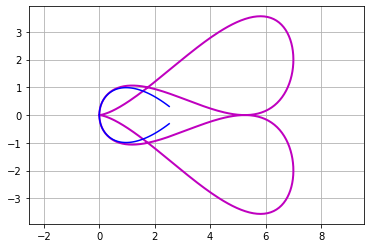

In [52]:
def tracer2() :
    tracer()
    dlX0_num = sb.lambdify(t,dlX0,"numpy")
    dlY0_num = sb.lambdify(t,dlY0,"numpy")
    T = np.linspace(-0.6,0.6,101)
    plt.plot(dlX0_num(T),dlY0_num(T),"-b")
tracer2()

$d)$ Faire de même lorque $t$ est au voisinage de $\pi$ (point singulier).

In [ ]:
dlX_pi = X.series(t,sb.pi,4) ; dlY_pi = Y.series(t,sb.pi,4) ; (dlX_pi,dlY_pi)

In [ ]:
h = sb.symbols("h")
[ e.replace(t,sb.pi+h).series(h,0,4) for e in (X,Y) ]

In [ ]:
dlX1,dlY1 = dlX_pi.replace(sb.O,lambda *x:0),dlY_pi.replace(sb.O,lambda *x:0) ; (dlX1,dlY1)

In [ ]:
def tracer3() :
    tracer2()
    dlX1_num = sb.lambdify(t,dlX1,"numpy")
    dlY1_num = sb.lambdify(t,dlY1,"numpy")
    T = np.linspace(np.pi-0.6,np.pi+0.6,101)
    plt.plot(dlX1_num(T),dlY1_num(T),"-g")
tracer3()

## <span style="color: #0000BB"> *Exercice 8* </span>

### <span style="color:purple"> 8.1 Objectifs </span>

#### <span style="color:#005500"> <i>Savoir déterminer une limite et aussi calculer une somme finie ou infinie.</i> </span>

### <span style="color:purple"> 8.2 Exemples </span>

#### <span style="color:#008080"> *Limites* </span>

In [ ]:
x = sb.symbols("x", real=True)
a = sb.symbols("a", positive=True)
F = (1+a*x)/(2-3*x) ; F

In [ ]:
F.limit(x, sb.oo)

In [ ]:
F.limit(x, sb.S(2)/3)

In [ ]:
print(sb.limit.__doc__[:749])

In [ ]:
F.limit(x, sb.S(2)/3, dir="+")

In [ ]:
F.limit(x, sb.S(2)/3, dir="-")

##### Limite calculée en 2 temps (déconseillé en général)

In [ ]:
limite_non_evaluee = sb.Limit(F, x, sb.S(2)/3, dir="-") ; limite_non_evaluee # Noter la majuscule à Limit

In [ ]:
limite_non_evaluee.doit()

#### <span style="color:#008080"> *Sommes* </span>

In [ ]:
r = sb.symbols("r", positive=True)
k,n = sb.symbols("k,n", integer=True, nonnegative=True)

In [ ]:
somme = sb.summation(r**n, (n, 0, sb.oo) ) ; somme

In [ ]:
un_moins_r = sb.symbols("umr", positive=True)
somme.replace( r , 1-un_moins_r ).simplify().replace( un_moins_r , 1-r )

In [ ]:
somme_partielle = sb.summation(r**k, (k, 0, n) ) ; somme_partielle

In [ ]:
rm1 = sb.symbols("rm1", nonzero=True)
S = somme_partielle.replace( r , rm1+1 ).simplify().replace( rm1 , r-1 ) ; S

Tous les algorithmes ne sont pas implémentés :

In [ ]:
try :
    somme_partielle.limit(n, sb.oo)
except Exception as e :
    print("Erreur :", e)

In [ ]:
try :
    S.limit(n, sb.oo)
except Exception as e :
    print("Erreur :",e)

In [ ]:
logr = sb.symbols("lambda", negative=True) # log(p) < 0, pour spécifier que p = exp(log(p)) < 1
etape1 = S.replace( r , sb.exp(logr) ) ; etape1

In [ ]:
etape2 = etape1.limit(n,sb.oo) ; etape2

In [ ]:
etape3 = etape2.replace(logr,sb.log(r)) ; etape3

In [ ]:
etap4 = etape3.together() ; etap4

##### Somme  calculée en 2 temps (déconseillé en général)

In [ ]:
somme_non_evaluee = sb.Sum(r**n,(n,0,sb.oo)) ; somme_non_evaluee

In [ ]:
somme_non_evaluee.doit()

### <span style="color:purple"> 8.3 Travail à faire </span>

#### Loi de probabilité discrète : la loi de Poisson 

$a)$ Définir $\displaystyle \mathtt{P_k}=\frac{\mu^k}{k!}\,\exp(-\mu)$, en spécifiant que $\mu$ est un nombre strictement positif et que $k$ est un entier naturel.

In [ ]:
mu = sb.symbols("mu", positive=True)
k = sb.symbols("k", integer=True, nonnegative=True)
Pk = mu**k / sb.factorial(k) * sb.exp(-mu)
Pk

$b)$ Vérifier que $\displaystyle \sum_{k=0}^{\infty}\mathtt{P_k}=1$ et calculer $\displaystyle \;\mathtt{EP}=\sum_{k=0}^{\infty}k\,\mathtt{P_k}\;$, $\displaystyle \;\mathtt{VP}=\sum_{k=0}^{\infty}(k-\mathtt{EP})^2\,\mathtt{P_k}\;$, ainsi que $\displaystyle \mathtt{R_n}=\sum_{k=n+1}^{\infty}\mathtt{P_k}=1-\sum_{k=0}^{n}\mathtt{P_k}$ pour $n$ entier naturel non nul.

In [ ]:
sb.summation(Pk, (k, 0, sb.oo) ).equals(1)

In [ ]:
EP = sb.summation( k * Pk, (k, 0, sb.oo) ) ; EP

In [ ]:
VP = sb.summation( (k-EP)**2 * Pk, (k, 0, sb.oo) ).expand() ; VP

In [ ]:
n = sb.symbols("n", integer=True, positive=True)
Rn = sb.summation( Pk, (k, n+1, sb.oo) ).simplify() ; Rn

In [ ]:
print(sb.lowergamma.__doc__[:235])